# Connecing to Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# About Data

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. Several constraints were placed
on the selection of these instances from a larger database. In particular, all patients here are females

About this file
Information about dataset attributes -

Pregnancies: To express the Number of pregnancies

Glucose: To express the Glucose level in blood

BloodPressure: To express the Blood pressure measurement

SkinThickness: To express the thickness of the skin

Insulin: To express the Insulin level in blood

BMI: To express the Body mass index

DiabetesPedigreeFunction: To express the Diabetes percentage

Age: To express the age

Outcome: To express the final result 1 is Yes and 0 is No

# Import Libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

# Importing Data

In [3]:
data = pd.read_csv('/content/drive/MyDrive/MachineLearningProjects/LogisticRegression/diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Collecting Info About Data

In [4]:
data.shape

(768, 9)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.duplicated().sum()

0



*   The data is not included time or object

*   There is no null value in data set
   
   





# Cleaning Data

In [8]:
df = data.copy()

In [9]:
df["SkinThickness"]=data["SkinThickness"].replace(0,data["SkinThickness"].mean())
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,0,33.6,0.627,50,1
1,1,85,66,29.000000,0,26.6,0.351,31,0
2,8,183,64,20.536458,0,23.3,0.672,32,1
3,1,89,66,23.000000,94,28.1,0.167,21,0
4,0,137,40,35.000000,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180,32.9,0.171,63,0
764,2,122,70,27.000000,0,36.8,0.340,27,0
765,5,121,72,23.000000,112,26.2,0.245,30,0
766,1,126,60,20.536458,0,30.1,0.349,47,1


In [10]:
df["Insulin"]=data["Insulin"].replace(0,data["Insulin"].mean())
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1


In [11]:
df["BloodPressure"]=data["BloodPressure"].replace(0,data["BloodPressure"].mean())
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60.0,20.536458,79.799479,30.1,0.349,47,1


In [12]:
df["Glucose"]=data["Glucose"].replace(0,data["Glucose"].mean())
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [13]:
df["BMI"]=data["BMI"].replace(0,data["BMI"].mean())
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


## Visualization

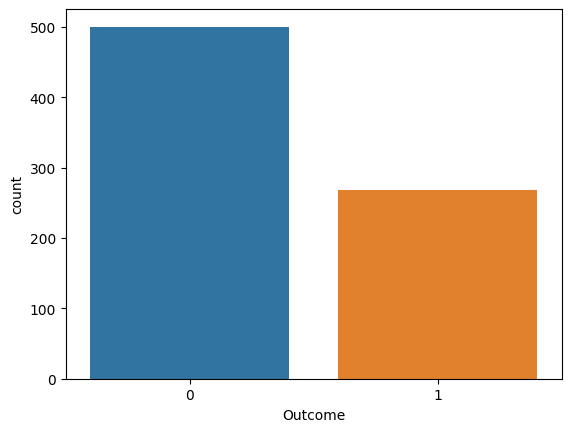

In [14]:
sns.countplot(x='Outcome',data=df)
plt.show()

In [15]:
p=sns.pairplot(df, hue = 'Outcome')

Output hidden; open in https://colab.research.google.com to view.

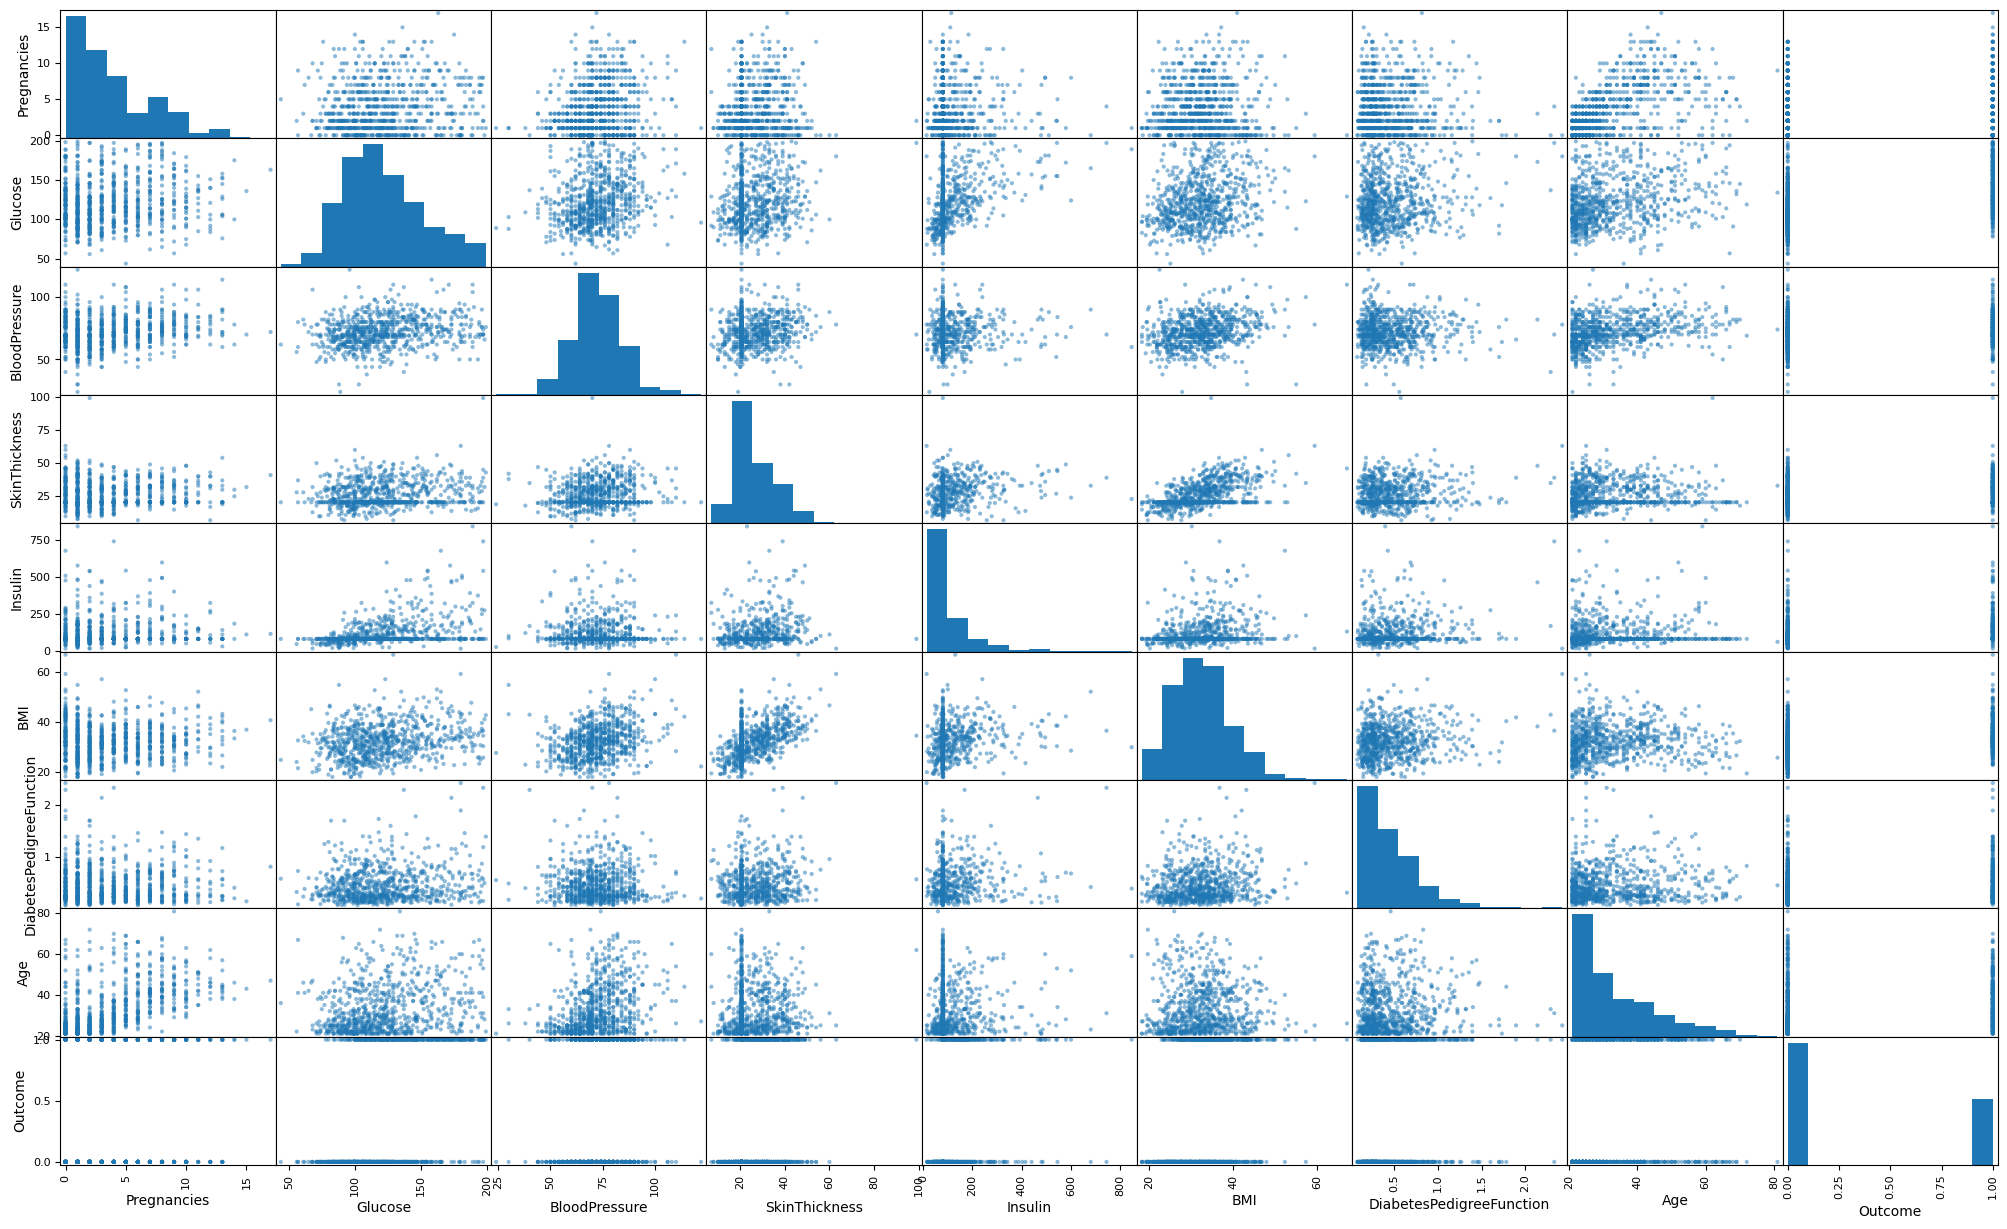

In [16]:
pd.plotting.scatter_matrix(df, figsize=(25,15), alpha=0.5)
plt.show()

### Correlation Matrix

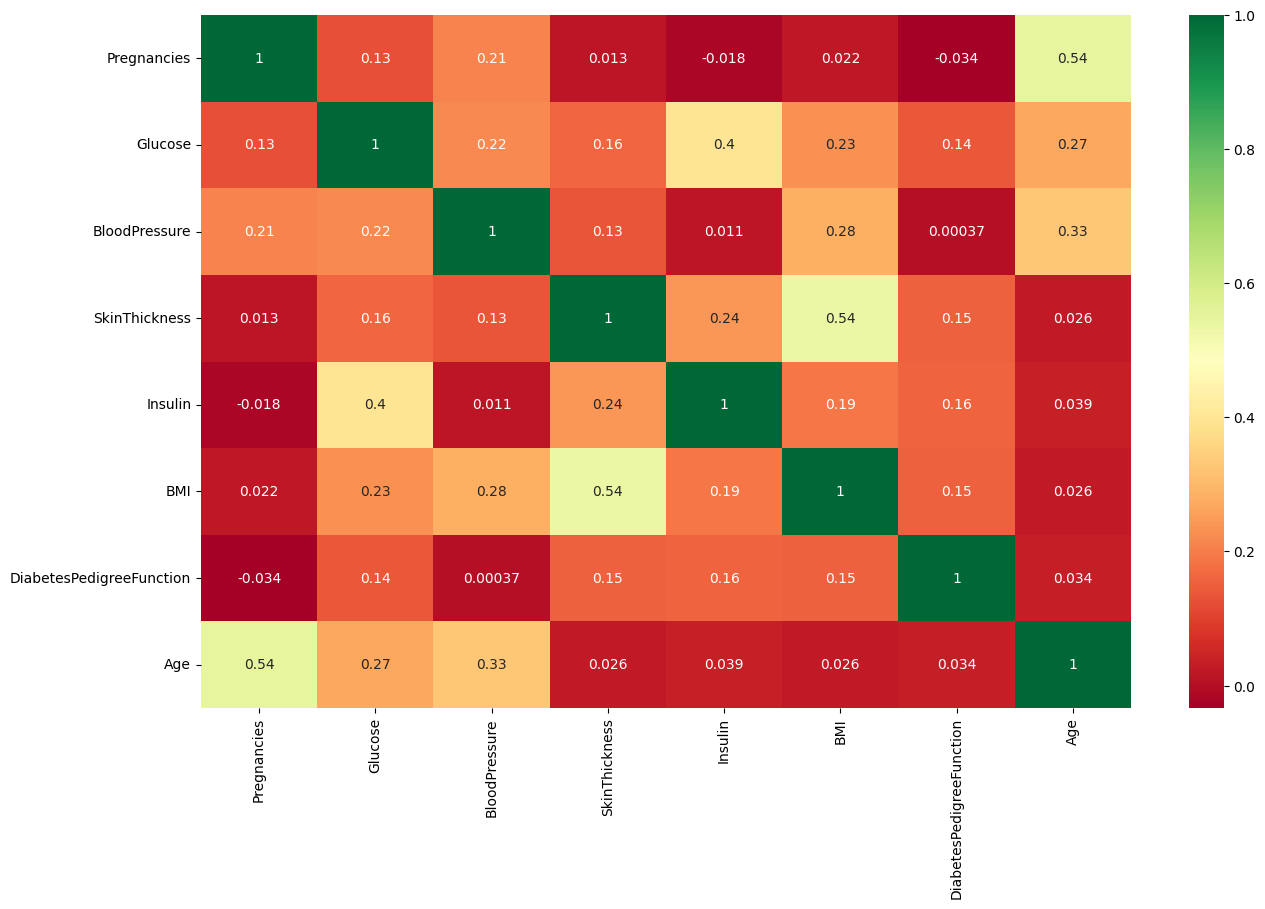

In [17]:
sns.heatmap(df[df.columns[:8]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(15,9)
plt.show()

# Spliting Data

In [18]:
y=df['Outcome']
X=df.drop(columns=['Outcome'])

In [19]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.25,random_state=0)

### Scaling Data

In [20]:
scaler= StandardScaler()
X =  pd.DataFrame(scaler.fit_transform(df.drop(["Outcome"],axis = 1)),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

# Building Model

In [39]:
model = LogisticRegression(solver='newton-cg')
model.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

# Evaluating Model

### Accuracy Score

In [40]:
Y_pred = model.predict(X_test)
print('The accuracy of the Logistic Regression is',accuracy_score(Y_pred,y_test))

The accuracy of the Logistic Regression is 0.796875


### Classification Report

In [23]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       130
           1       0.48      0.37      0.42        62

    accuracy                           0.67       192
   macro avg       0.60      0.59      0.59       192
weighted avg       0.65      0.67      0.65       192



### Confusion Matrix

In [24]:
confusion_matrix(y_test,Y_pred)
pd.crosstab(y_test, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,105,25,130
1,39,23,62
All,144,48,192


Text(0.5, 23.52222222222222, 'Predicted label')

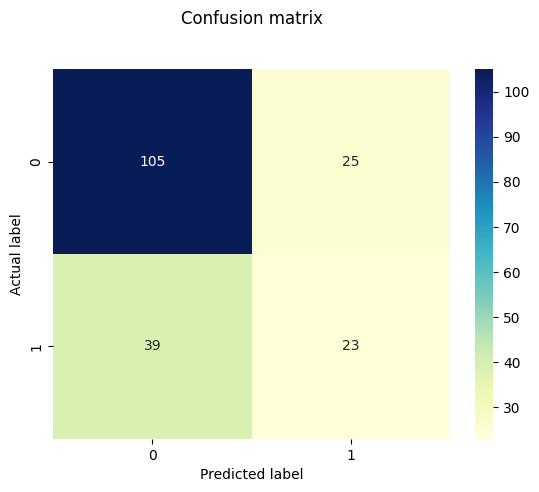

In [25]:
cnf_matrix = confusion_matrix(y_test, Y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')